## 09-3 Word2Vec

### (1) 영어

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

#### 데이터 다운로드

In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x1e64b916088>)

#### 전처리
xml 파일로 되어있는 자연어를 전처리       
-> <content>와 </content> 사이에 실질적 데이터를 담고 있으므로 해당 데이터만 가져온다

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행. (문장 토큰화: 텍스트 -> 문장별로 분리)
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행. (단어 토큰화: 문장 -> 단어별로 분리)
result = [word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [4]:
result

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [6]:
print(result[:2])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']]


#### Word2Vec 훈련시키기

#### gensim.models.Word2Vec
- vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [9]:
#!pip install gensim

In [11]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [13]:
# 'man'과 가장 유사한 단어
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8562139272689819), ('guy', 0.8224342465400696), ('lady', 0.7787516713142395), ('boy', 0.7683444619178772), ('girl', 0.7656236290931702), ('soldier', 0.7595803141593933), ('gentleman', 0.738785982131958), ('kid', 0.7024628520011902), ('poet', 0.7016308307647705), ('photographer', 0.66140216588974)]


#### 모델 저장 및 로드

In [14]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [15]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8562139272689819), ('guy', 0.8224342465400696), ('lady', 0.7787516713142395), ('boy', 0.7683444619178772), ('girl', 0.7656236290931702), ('soldier', 0.7595803141593933), ('gentleman', 0.738785982131958), ('kid', 0.7024628520011902), ('poet', 0.7016308307647705), ('photographer', 0.66140216588974)]


### (2) 한국어 (네이버 영화 리뷰)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1e60ecd3c08>)

In [18]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [19]:
print(len(train_data))

200000


In [21]:
# null값 존재 유무
print(train_data.isnull().values.any())

True


In [22]:
# 결측값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [23]:
# 결측값 제거 후 리뷰 개수
print(len(train_data))

199992


#### 전처리 - 한글 이외의 문자 제거

In [24]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\yejin.hwang\AppData\Local\Programs\Python\Python37\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [25]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


#### 불용어 제거

In [30]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [08:34<00:00, 388.86it/s]


리뷰 데이터 예시: [['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다']]
리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


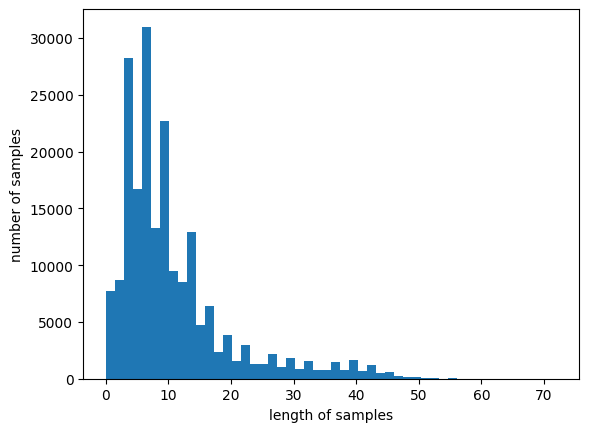

In [32]:
print('리뷰 데이터 예시:', tokenized_data[:2])
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [34]:
# 완성된 임베딩 매트릭스의 크기 확인
model2.wv.vectors.shape

(16477, 100)

In [35]:
# '최민식'과 유사한 단어
print(model2.wv.most_similar("최민식"))

[('한석규', 0.8613114953041077), ('안성기', 0.8495312333106995), ('서영희', 0.8464216589927673), ('이민호', 0.8401496410369873), ('최민수', 0.8257887363433838), ('송강호', 0.824321985244751), ('설경구', 0.822995662689209), ('김명민', 0.8211231827735901), ('김창완', 0.8196403980255127), ('조재현', 0.8136685490608215)]


In [36]:
# '히어로'와 유사한 단어
print(model2.wv.most_similar("히어로"))

[('무협', 0.8670909404754639), ('호러', 0.8631842136383057), ('슬래셔', 0.8604472875595093), ('느와르', 0.8404291868209839), ('물의', 0.8290987610816956), ('정통', 0.8170696496963501), ('무비', 0.8061387538909912), ('로코', 0.8009361624717712), ('물', 0.7945625185966492), ('멜로', 0.7903599143028259)]


In [38]:
model2.wv['히어로']

array([-0.39096114,  0.35665977, -0.28464866,  0.7937128 ,  0.85640675,
        0.72667044,  0.29474357,  0.04595488,  0.12784779,  0.01774746,
       -0.14125444, -1.1343646 , -0.75988686, -0.04495785, -0.14963165,
       -0.65253854,  0.05911248, -0.00464274,  0.01348149, -0.8323495 ,
       -0.049224  , -0.00720296, -0.5739409 ,  0.10020956, -0.32029098,
       -0.30771792, -1.0676705 , -0.3639224 , -0.5762627 ,  0.10874891,
        0.09007213,  0.16373865,  0.34633234, -0.20696294,  0.14962453,
        0.28113177,  0.30492118,  0.8271273 , -0.09205882, -0.30645463,
        0.35168105, -0.5514448 , -0.43344507,  0.94354874, -0.55030864,
       -0.58312905,  0.7326441 ,  0.07145616,  1.4373536 ,  0.68603146,
        0.10569412, -0.19668905, -0.04302214, -0.21257812,  0.35972562,
       -0.07377391,  0.179218  , -0.5970771 ,  0.04665565, -0.04825111,
       -0.7414894 , -0.06635237,  0.527343  , -0.0518956 , -1.1549888 ,
       -0.50559336,  0.2700939 ,  0.02789599, -0.44085258,  0.83

In [39]:
model2.wv['히어로'].shape

(100,)

### *사전 훈련된 word2Vec
구글에서 사전 훈련된 3백만개의 Word2Vec 단어 벡터 제공       
각 임베딩 벡터의 차원은 300         
모델 다운로드: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [ ]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
# 두 단어의 유사도 계산
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

## 09-4 Skip-Gram with Negative Sampling (SGNS)

In [42]:
#!pip install tensorflow

In [43]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [44]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [45]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\yejin.hwang\AppData\Local\Programs\Python\Python37\py37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# null값 확인
news_df.isnull().values.any()

# 비어있는 값 확인(빈 값을 null로 변환하고, null값이 있는지 다시 확인)
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [47]:
# null값 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [48]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


C:\Users\yejin.hwang\AppData\Local\Programs\Python\Python37\py37\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


#### 네거티브 샘플링

In [51]:
vocab_size = len(word2idx) + 1 

from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [52]:
# 첫번째 샘플에 대해 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(degree (1530), ignore (1979)) -> 1
(disagree (1495), ecclesiates (35284)) -> 0
(existance (4865), described (984)) -> 1
(ruin (9470), ruff (8601)) -> 0
(israeli (442), lived (1148)) -> 1


In [53]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [54]:
# 모든 뉴스그룹 샘플에 대해 네거티브 샘플링 수행
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

#### SGNS 구현

In [55]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [56]:
# 임베딩 벡터 차원
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)


# 중심 단어와 주변 단어의 내적 수행 -> 시그모이드를 거쳐 최종 예측값을 얻음 
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

In [58]:
# 모델 수행: 5 epochs
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 2848.005216978956


KeyboardInterrupt: 

#### 결과 확인

In [ ]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
# soldiers 와 비슷한 단어 확인
w2v.most_similar(positive=['soldiers'])

In [ ]:
w2v.most_similar(positive=['doctor'])

## 09-5 Glove

In [ ]:
# 패키지 설치
#!pip install glove_python_binary

In [ ]:
# from glove import Corpus, Glove

# corpus = Corpus() 

# # 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
# corpus.fit(result, window=5)
# glove = Glove(no_components=100, learning_rate=0.05)

# # 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
# glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
# glove.add_dictionary(corpus.dictionary)

In [ ]:
#print(glove.most_similar("man"))

## 09-14 해보기